<a href="https://colab.research.google.com/github/Boduck/Data-Analysis/blob/main/%EC%9C%A0%ED%86%B5_%EB%A7%88%EC%BC%80%ED%8C%85_AB_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **마케팅 A/B Test**
---
> **목차(Context)**

* 프로젝트 Summary
* 문제상황 Introduction

## **프로젝트 Summary**
---

> **프로젝트명**

```
▶ 마케팅 A/B Test
```  

> **프로젝트유형**

```
▶ 마케팅 프로모션에 대한 A/B Test

```

> **예상 결과물**

```
▶ A/B 테스트 설계 및 실행 계획 문서
▶ 테스트 그룹별 성과 분석 보고서
▶ 통계적 방법을 사용한 테스트 결과의 유의성 검증 결과
▶ 최종적으로 효과적인 마케팅 전략을 위한 추천 방안 및 제안서
```


## **문제상황 Introduction**
---
> **시나리오**

```
기업 XYZ는 새로운 마케팅 프로모션 전략을 도입하려고 계획하고 있다. 이전의 전략은 기대했던 효과를 보이지 못하여, 개선된 전략이 실제로 더 나은 성과를 가져올 수
있는지를 검증하기 위한 방법이 필요하게 되었다. 마케팅팀은 "마케팅 A/B Test" 프로젝트를 시작하여, 서로 다른 마케팅 전략의 효과를 직접 비교하기로 결정한다.
하나는 기존의 전략이며, 다른 하나는 새롭게 제안된 전략들이다. 고객들은 무작위로 두 그룹으로 나누어질 것이며, 각 그룹은 서로 다른 마케팅 전략을 경험하게 될 것이다.
프로젝트 진행 과정에서, 데이터 분석 팀은 테스트 그룹별로 발생하는 성과를 주기적으로 모니터링하며, 데이터를 수집한다. 테스트가 완료된 후, 분석팀은 성과 데이터를 깊이
분석하여 어느 전략이 더 나은 성과를 보였는지, 그 차이가 통계적으로 유의미한지를 평가한다. 프로젝트 종료 후, 마케팅팀은 데이터 분석 팀의 결과를 기반으로 더 효과적인
마케팅 전략을 선정하게 된다. 분석 결과와 추천 방안을 바탕으로, 기업 XYZ는 마케팅 효율성을 크게 향상시키게 된다.
```  

> **문제정의**

```
▶ 마케팅 전략별 효과에 대한 검증 수단의 부재
```  

> **기대효과**

```
▶ 데이터에 기반한 마케팅 전략별 효과 시각화
▶ 통계적 검증에 따른 마케팅 효과 신뢰도 상승
```

> **해결방안**

```
▶ 세부 구분에 따른 매출액 시각화
▶ t-검정으로 매출액 상승 판단 지표 마련
```

> **성과측정**  

```
▶ 고객 매출액 데이터 테스트 전후 대시보드 모니터링
▶ 시행 전후 데이터 t-검정 결과 산출
```

> **데이터 살펴보기**

|Column|Description|
|:---|:---|
|MarketID|고유 식별자|
|MarketSize|판매량에 따른 시장 영역의 크기|
|LocationID|매장 위치의 고유 식별자|
|AgeOfStore|매장의 연령(설립된 지 몇 년인지)|
|Promotion|테스트된 세 가지 프로모션 중 하나|
|SalesInThousands|특정 LocationID, Promotion, 그리고 주에 대한 매출액 (천 단위)|




In [ ]:
# ▶ Warnings 제거
import warnings
warnings.filterwarnings('ignore')

# ▶ Google drive mount or 폴더 클릭 후 구글드라이브 연결
from google.colab import drive
drive.mount('/content/drive')

# ▶ 경로 설정 (※강의자료가 위치에 있는 경로 확인)
import os
os.chdir("/content/drive/MyDrive/")
os.getcwd()

Mounted at /content/drive


'/content/drive/MyDrive'

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# ▶ Data read
df = pd.read_csv('P_PJT05_DATA.csv')
df.head()

,MarketID,MarketSize,LocationID,AgeOfStore,Promotion,week,SalesInThousands
0,1,Medium,1,4,3,1,33.73
1,1,Medium,1,4,3,2,35.67
2,1,Medium,1,4,3,3,29.03
3,1,Medium,1,4,3,4,39.25
4,1,Medium,2,5,2,1,27.81


# EDA

In [ ]:
df.shape

(548, 7)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548 entries, 0 to 547
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MarketID          548 non-null    int64  
 1   MarketSize        548 non-null    object 
 2   LocationID        548 non-null    int64  
 3   AgeOfStore        548 non-null    int64  
 4   Promotion         548 non-null    int64  
 5   week              548 non-null    int64  
 6   SalesInThousands  548 non-null    float64
dtypes: float64(1), int64(5), object(1)
memory usage: 30.1+ KB


In [ ]:
df.describe() #MarketID, Promotion은 수치형 변수 아님

,MarketID,LocationID,AgeOfStore,Promotion,week,SalesInThousands
count,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000
mean,5.715328,479.656934,8.503650,2.029197,2.500000,53.466204
std,2.877001,287.973679,6.638345,0.810729,1.119055,16.755216
min,1.000000,1.000000,1.000000,1.000000,1.000000,17.340000
25%,3.000000,216.000000,4.000000,1.000000,1.750000,42.545000
50%,6.000000,504.000000,7.000000,2.000000,2.500000,50.200000
75%,8.000000,708.000000,12.000000,3.000000,3.250000,60.477500
max,10.000000,920.000000,28.000000,3.000000,4.000000,99.650000


In [ ]:
df.Promotion.unique()

array([3, 2, 1])

<Axes: >

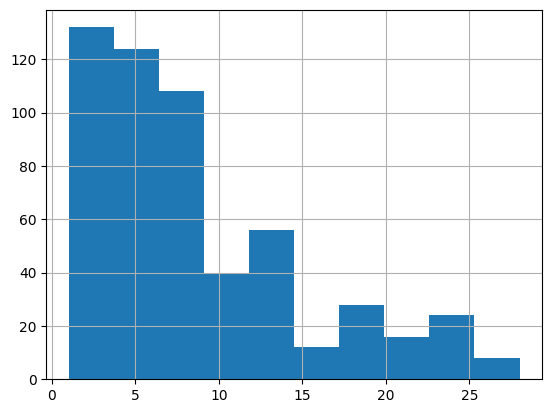

In [ ]:
df.AgeOfStore.hist()

In [ ]:
df.Promotion.value_counts() #프로모션별 고객 배분 고르게 이루어짐

Promotion
3    188
2    188
1    172
Name: count, dtype: int64

In [ ]:
df.groupby(['Promotion', 'MarketSize'])['MarketID'].count() #3가지 프로모션별로 시장영역의 크기(MarketSize)에 따른 고른 배분이 이루어지진 않은듯

Promotion  MarketSize
1          Large          56
           Medium         96
           Small          20
2          Large          64
           Medium        108
           Small          16
3          Large          48
           Medium        116
           Small          24
Name: MarketID, dtype: int64

# Monitoring Dashboard
---
## 1. 프로모션별 성과 측정
- 시장 크기를 고려하여 개별 산출

In [ ]:
tmp=df.copy()
tmp.groupby(['Promotion'])['SalesInThousands'].sum()    #Promotion별 총 매출액 합

Promotion
1     9993.03
2     8897.93
3    10408.52
Name: SalesInThousands, dtype: float64

In [ ]:
#프로모션, 시장크기별 총 매출액
pm_sz = df.groupby(['Promotion', 'MarketSize'])[['SalesInThousands']].sum().rename(columns = {'SalesInThousands':'Total_Sales'})
pm_sz

Total_Sales
Promotion MarketSize             
1         Large           4213.21
          Medium          4576.57
          Small           1203.25
2         Large           3860.61
          Medium          4224.35
          Small            812.97
3         Large           3705.79
          Medium          5274.39
          Small           1428.34

In [ ]:
pm_sz.reset_index(inplace=True)

In [ ]:
#프로모션별 데이터 구분
pm1 = pm_sz.loc[pm_sz['Promotion']==1]
pm2 = pm_sz.loc[pm_sz['Promotion']==2]
pm3 = pm_sz.loc[pm_sz['Promotion']==3]

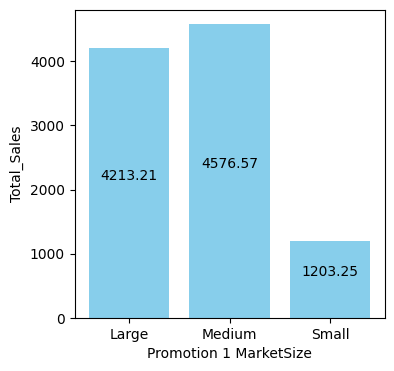

In [ ]:
#Promotion == 1
plt.figure(figsize=(4,4))
bars = plt.bar(pm1['MarketSize'], pm1['Total_Sales'], color='skyblue')
plt.xticks(pm1['MarketSize'].unique().tolist())
plt.xlabel('Promotion 1 MarketSize')
plt.ylabel('Total_Sales')
# 막대 위에 값 표시하기
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height/2, f'{height}', ha='center', va='bottom')

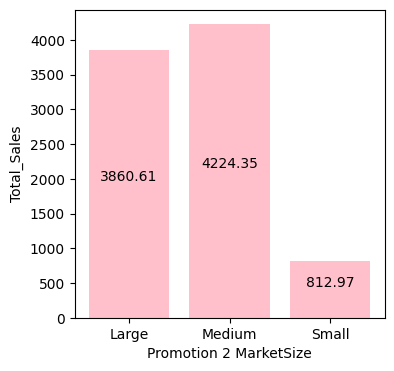

In [ ]:
#Promotion == 2
plt.figure(figsize=(4,4))
bars = plt.bar(pm2['MarketSize'], pm2['Total_Sales'], color='pink')
plt.xticks(pm2['MarketSize'].unique().tolist())
plt.xlabel('Promotion 2 MarketSize')
plt.ylabel('Total_Sales')
# 막대 위에 값 표시하기
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height/2, f'{height}', ha='center', va='bottom')

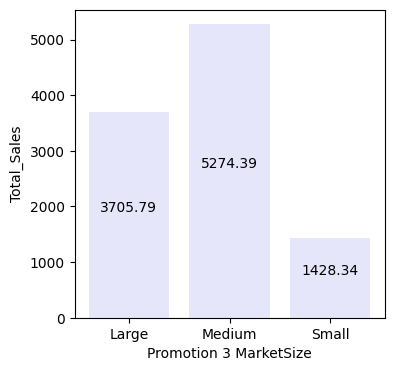

In [ ]:
#Promotion == 3
plt.figure(figsize=(4,4))
bars = plt.bar(pm3['MarketSize'], pm3['Total_Sales'], color='lavender')
plt.xticks(pm3['MarketSize'].unique().tolist())
plt.xlabel('Promotion 3 MarketSize')
plt.ylabel('Total_Sales')
# 막대 위에 값 표시하기
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height/2, f'{height}', ha='center', va='bottom')

# t-검정을 활용한 매출액 상승 파악
---
#### **t-검정 수행 가설**
```
귀무가설(H0): 매출액이 증가했다고 보기 어렵다.
대립가설(H1): 매출액이 증가했다고 볼 수 있다.
```


#### **코드 요약**
> 1. 임의로 프로모션 시행 전후 데이터 구분

```
1) 프로모션별 시장크기별로 프로모션 전후 데이터를 고르게 배분
2) 매출액이 적은 데이터가 프로모션 시행 전 데이터로 선정되도록 부여
```
> 2. t-검정(시장 크기 고려 X)

> 3. t-검정(시장 크기 고려 O)

## 데이터 분할

In [ ]:
#프로모션별 데이터 구분
pm1 = df.loc[df['Promotion']==1].sort_values('SalesInThousands')
pm2 = df.loc[df['Promotion']==2].sort_values('SalesInThousands')
pm3 = df.loc[df['Promotion']==3].sort_values('SalesInThousands')

In [ ]:
#프로모션 시행 전,후를 구분하는 컬럼 생성 및 부여
def assign_period(group):
  group['Period'] = 'After'
  num_rows = len(group)
  before_count = num_rows // 2
  group.iloc[:before_count, group.columns.get_loc('Period')] = 'Before'
  return group

In [ ]:
pm1 = pm1.groupby('MarketSize').apply(assign_period).reset_index(drop=True)
pm2 = pm2.groupby('MarketSize').apply(assign_period).reset_index(drop=True)
pm3 = pm3.groupby('MarketSize').apply(assign_period).reset_index(drop=True)

In [ ]:
pm1.groupby(['MarketSize','Period'])['MarketID'].count() #고르게 배분되었는지 확인

MarketSize  Period
Large       After     28
            Before    28
Medium      After     48
            Before    48
Small       After     10
            Before    10
Name: MarketID, dtype: int64

In [ ]:
pm2.groupby(['MarketSize','Period'])['MarketID'].count() #고르게 배분되었는지 확인

MarketSize  Period
Large       After     32
            Before    32
Medium      After     54
            Before    54
Small       After      8
            Before     8
Name: MarketID, dtype: int64

In [ ]:
pm3.groupby(['MarketSize','Period'])['MarketID'].count() #고르게 배분되었는지 확인

MarketSize  Period
Large       After     24
            Before    24
Medium      After     58
            Before    58
Small       After     12
            Before    12
Name: MarketID, dtype: int64

## t-검정 수행

In [ ]:
from scipy import stats

### 시장 크기 고려 X

In [ ]:
# 프로모션 전후 매출액 기술 통계 확인
print('Promotion 1 시행 효과 분석')
print(pm1.groupby('Period')['SalesInThousands'].describe(),'\n')

# t-검정 수행
before_sales = pm1[pm1['Period'] == 'Before']['SalesInThousands']
after_sales = pm1[pm1['Period'] == 'After']['SalesInThousands']
t_stat, p_value = stats.ttest_ind(before_sales, after_sales)

print(f"t-Statistic: {t_stat}, p-Value: {p_value}",'\n')

# 결과 해석
if p_value < 0.05:
    print("Promotion 1 시행 후 매출액이 유의미하게 증가했습니다.")
else:
    print("Promotion 1 시행 후 매출액이 유의미하게 증가하지 않았습니다.")

Promotion 1 시행 효과 분석
        count       mean        std    min    25%     50%      75%    max
Period                                                                   
After    86.0  67.077907  16.733629  47.50  54.46  60.105  85.5850  99.65
Before   86.0  49.120116  10.398405  30.81  41.10  46.255  59.5225  68.31 

t-Statistic: -8.452930232651857, p-Value: 1.2365316719528816e-14 

Promotion 1 시행 후 매출액이 유의미하게 증가했습니다.


In [ ]:
# 프로모션 전후 매출액 기술 통계 확인
print('Promotion 2 시행 효과 분석')
print(pm2.groupby('Period')['SalesInThousands'].describe(),'\n')

# t-검정 수행
before_sales = pm2[pm2['Period'] == 'Before']['SalesInThousands']
after_sales = pm2[pm2['Period'] == 'After']['SalesInThousands']
t_stat, p_value = stats.ttest_ind(before_sales, after_sales)

print(f"t-Statistic: {t_stat}, p-Value: {p_value}",'\n')

# 결과 해석
if p_value < 0.05:
    print("Promotion 2 시행 후 매출액이 유의미하게 증가했습니다.")
else:
    print("Promotion 2 시행 후 매출액이 유의미하게 증가하지 않았습니다.")

Promotion 2 시행 효과 분석
        count       mean        std    min      25%    50%      75%    max
Period                                                                    
After    94.0  56.289681  14.738622  39.80  44.9000  51.59  64.9775  88.64
Before   94.0  38.369149   8.915680  17.34  31.6775  38.08  46.1575  52.36 

t-Statistic: -10.086583610967956, p-Value: 2.322881758222661e-19 

Promotion 2 시행 후 매출액이 유의미하게 증가했습니다.


In [ ]:
# 프로모션 전후 매출액 기술 통계 확인
print('Promotion 3 시행 효과 분석')
print(pm3.groupby('Period')['SalesInThousands'].describe(),'\n')

# t-검정 수행
before_sales = pm3[pm3['Period'] == 'Before']['SalesInThousands']
after_sales = pm3[pm3['Period'] == 'After']['SalesInThousands']
t_stat, p_value = stats.ttest_ind(before_sales, after_sales)

print(f"t-Statistic: {t_stat}, p-Value: {p_value}",'\n')

# 결과 해석
if p_value < 0.05:
    print("Promotion 3 시행 후 매출액이 유의미하게 증가했습니다.")
else:
    print("Promotion 3 시행 후 매출액이 유의미하게 증가하지 않았습니다.")

Promotion 3 시행 효과 분석
        count       mean        std    min      25%     50%     75%    max
Period                                                                    
After    94.0  62.453511  15.819823  46.30  50.1475  54.990  79.570  96.48
Before   94.0  48.275426  14.607500  22.18  39.2900  44.195  54.595  82.13 

t-Statistic: -6.3839329677163175, p-Value: 1.34060457004848e-09 

Promotion 3 시행 후 매출액이 유의미하게 증가했습니다.


### 시장 크기 고려 O

In [ ]:
for market_size in market_sizes:
    before_sales = df[(df['MarketSize'] == market_size) & (df['Period'] == 'Before')]['SalesInThousands']
    after_sales = df[(df['MarketSize'] == market_size) & (df['Period'] == 'After')]['SalesInThousands']
    t_stat, p_value = stats.ttest_ind(before_sales, after_sales)
    results[market_size] = (t_stat, p_value)

# t-검정 결과 출력
for market_size, (t_stat, p_value) in results.items():
    print(f"Market Size: {market_size}")
    print(f"t-Statistic: {t_stat}, p-Value: {p_value}")
    if p_value < 0.05:
        print("유의미한 매출 증가가 있습니다.\n")
    else:
        print("유의미한 매출 증가가 없습니다.\n")

In [ ]:
# t-검정 수행
before_sales = pm3[pm3['Period'] == 'Before']['SalesInThousands']
after_sales = pm3[pm3['Period'] == 'After']['SalesInThousands']
t_stat, p_value = stats.ttest_ind(before_sales, after_sales)

In [ ]:
def t_test_by_market_size(df, name):
    # MarketSize별 t-검정 수행
    results = {}
    market_sizes = df['MarketSize'].unique()

    for market_size in market_sizes:
        before_sales = df[(df['MarketSize'] == market_size) & (df['Period'] == 'Before')]['SalesInThousands']
        after_sales = df[(df['MarketSize'] == market_size) & (df['Period'] == 'After')]['SalesInThousands']
        t_stat, p_value = stats.ttest_ind(before_sales, after_sales)
        results[market_size] = (t_stat, p_value)

    print("------------------------------------------------------------")
    print(f"{name}의 결과는 아래와 같습니다:\n")

    for market_size, (t_stat, p_value) in results.items():
      print(f"Market Size: {market_size}")
      print(f"t-Statistic: {t_stat}, p-Value: {p_value}")
      if p_value < 0.05:
        print("유의미한 매출 증가가 있습니다.\n")
      else:
        print("유의미한 매출 증가가 없습니다.\n")

    return

In [ ]:
t_test_by_market_size(pm1, 'Promotion 1')
t_test_by_market_size(pm2, 'Promotion 2')
t_test_by_market_size(pm3, 'Promotion 3')

------------------------------------------------------------
Promotion 1의 결과는 아래와 같습니다:

Market Size: Large
t-Statistic: -19.942420700051308, p-Value: 1.4256348393981768e-26
유의미한 매출 증가가 있습니다.

Market Size: Medium
t-Statistic: -15.35667945527889, p-Value: 2.3056964495147867e-27
유의미한 매출 증가가 있습니다.

Market Size: Small
t-Statistic: -7.129057832830541, p-Value: 1.2148643546812596e-06
유의미한 매출 증가가 있습니다.

------------------------------------------------------------
Promotion 2의 결과는 아래와 같습니다:

Market Size: Large
t-Statistic: -12.231493516334337, p-Value: 3.5405293728663445e-18
유의미한 매출 증가가 있습니다.

Market Size: Medium
t-Statistic: -14.799293477666598, p-Value: 1.5208694851857646e-27
유의미한 매출 증가가 있습니다.

Market Size: Small
t-Statistic: -4.151726668520459, p-Value: 0.0009782699302775914
유의미한 매출 증가가 있습니다.

------------------------------------------------------------
Promotion 3의 결과는 아래와 같습니다:

Market Size: Large
t-Statistic: -7.319067640177236, p-Value: 3.033499033275916e-09
유의미한 매출 증가가 있습니다.

Market Si